### END experiment 11 March 2019 24:00 for weather calculations

In [19]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import lifelines
from lifelines.utils import datetimes_to_durations
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from sklearn.preprocessing import  LabelEncoder
import lifelines as sa
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import datetime
import pickle
warnings.filterwarnings('ignore')
%matplotlib inline

In [20]:
df=pd.read_csv('df_cox_master.csv')
df.columns

Index(['Asset_Number', 'ELR', 'High_Level_Asset_Class', 'Asset_Class_Grouping',
       'Grouping_Full_Name', 'Engineering_Suffix', 'System_Asset_Type',
       'EQUIP_CLASS_DESC', 'birth', 'death', 'event', 'duration', 'T',
       'Start_Latitude', 'Start_Longitude', 'End_Latitude', 'End_Longitude',
       'midpoint_Latitude', 'midpoint_Longitude', 'weather_station', 'Sum'],
      dtype='object')

In [21]:
len(df)

940

In [22]:
df.isnull().sum()

Asset_Number                0
ELR                         0
High_Level_Asset_Class      0
Asset_Class_Grouping        0
Grouping_Full_Name          0
Engineering_Suffix          0
System_Asset_Type           0
EQUIP_CLASS_DESC            0
birth                       0
death                     637
event                       0
duration                    0
T                           0
Start_Latitude              0
Start_Longitude             0
End_Latitude               34
End_Longitude              34
midpoint_Latitude          34
midpoint_Longitude         34
weather_station             0
Sum                       293
dtype: int64

In [23]:
df.birth.max(), df.birth.min()

('31/12/2017 13:55', '01/01/2017 09:00')

In [24]:
#df.death.max(), df.death.min()# not possible because of censored data

In [25]:
df.weather_station.unique()

array(['Leeds', 'York', 'Manchester', 'Mirfield', 'Huddersfield'],
      dtype=object)

In [26]:
def save_dict_pickle(dict, file):
    with open('./conf/'+file+'.pickle', 'wb') as handle:
        pickle.dump(dict, handle)
    return

In [27]:
# df['event_happens']=df.apply(lambda row: event_observed(row), axis=1 )

In [28]:
df.columns

Index(['Asset_Number', 'ELR', 'High_Level_Asset_Class', 'Asset_Class_Grouping',
       'Grouping_Full_Name', 'Engineering_Suffix', 'System_Asset_Type',
       'EQUIP_CLASS_DESC', 'birth', 'death', 'event', 'duration', 'T',
       'Start_Latitude', 'Start_Longitude', 'End_Latitude', 'End_Longitude',
       'midpoint_Latitude', 'midpoint_Longitude', 'weather_station', 'Sum'],
      dtype='object')

In [29]:
df_r=df[['event',  'T', 'Asset_Number','ELR', 'High_Level_Asset_Class', 'Asset_Class_Grouping',
       'Grouping_Full_Name', 'Engineering_Suffix', 'System_Asset_Type',
       'EQUIP_CLASS_DESC','birth', 'death','Sum', 'weather_station']] # classtype

In [30]:
df_r['Sum'].fillna(0, inplace=True)

In [31]:
df_r.isnull().sum()

event                       0
T                           0
Asset_Number                0
ELR                         0
High_Level_Asset_Class      0
Asset_Class_Grouping        0
Grouping_Full_Name          0
Engineering_Suffix          0
System_Asset_Type           0
EQUIP_CLASS_DESC            0
birth                       0
death                     637
Sum                         0
weather_station             0
dtype: int64

In [32]:
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
le6 = LabelEncoder()
le5 = LabelEncoder()
le7 = LabelEncoder()
le8 = LabelEncoder()

# LABEL ENCODING CATEGORICAL FEATURES

In [33]:
df_r['ELR_enc'] = le1.fit_transform(df_r['ELR'].astype(str).values)
ELR_enc = dict(zip(le1.classes_, le1.transform(le1.classes_)))
save_dict_pickle(ELR_enc, 'AFI_ELR_enc')

df_r['HLC_enc'] = le2.fit_transform(df_r['High_Level_Asset_Class'].astype(str).values)
HLC_enc = dict(zip(le2.classes_, le2.transform(le2.classes_)))
save_dict_pickle(HLC_enc, 'AFI_HLC_enc')

df_r['Asset_Class_Grouping_enc'] = le3.fit_transform(df_r['Asset_Class_Grouping'].astype(str).values)
Asset_Class_Grouping_enc = dict(zip(le3.classes_, le3.transform(le3.classes_)))
save_dict_pickle(Asset_Class_Grouping_enc, 'AFI_Asset_Class_Grouping_enc')

df_r['Grouping_Full_Name_enc'] = le4.fit_transform(df_r['Grouping_Full_Name'].astype(str).values)
Grouping_Full_Name_enc = dict(zip(le4.classes_, le4.transform(le4.classes_)))
save_dict_pickle(Grouping_Full_Name_enc, 'AFI_Grouping_Full_Name_enc')

df_r['Engineering_Suffix_enc'] = le5.fit_transform(df_r['Engineering_Suffix'].astype(str).values)
Engineering_Suffix_enc = dict(zip(le5.classes_, le5.transform(le5.classes_)))
save_dict_pickle(Engineering_Suffix_enc, 'AFI_Engineering_Suffix_enc')

df_r['System_Asset_Type_enc'] = le6.fit_transform(df_r['System_Asset_Type'].astype(str).values)
System_Asset_Type_enc = dict(zip(le6.classes_, le6.transform(le6.classes_)))
save_dict_pickle(System_Asset_Type_enc, 'AFI_System_Asset_Type_enc')

df_r['EQUIP_CLASS_DESC_enc'] = le7.fit_transform(df_r['EQUIP_CLASS_DESC'].astype(str).values)
EQUIP_CLASS_DESC_enc = dict(zip(le7.classes_, le7.transform(le7.classes_)))
save_dict_pickle(EQUIP_CLASS_DESC_enc, 'EQUIP_CLASS_DESC_enc')

df_r['weather_station_enc'] = le8.fit_transform(df_r['weather_station'].astype(str).values)
weather_station_enc = dict(zip(le8.classes_, le8.transform(le8.classes_)))
save_dict_pickle(weather_station_enc, 'AFI_weather_station_enc')

In [16]:
## Create dummy variables
#df_dummy = pd.get_dummies(df_r, drop_first=False)

In [34]:
df_r.head()

,event,T,Asset_Number,ELR,High_Level_Asset_Class,Asset_Class_Grouping,Grouping_Full_Name,Engineering_Suffix,System_Asset_Type,EQUIP_CLASS_DESC,...,Sum,weather_station,ELR_enc,HLC_enc,Asset_Class_Grouping_enc,Grouping_Full_Name_enc,Engineering_Suffix_enc,System_Asset_Type_enc,EQUIP_CLASS_DESC_enc,weather_station_enc
0,0,267.106203,48075,DOL2,Track,Track,Track,TRACK (P.W),TRACK,Track ID ...,...,0.0,Leeds,4,3,8,9,24,86,40,1
1,1,0.791435,48081,DOL2,Track,Track,Track,TRACK (P.W),TRACK,Track ID ...,...,0.0,Leeds,4,3,8,9,24,86,40,1
2,1,40.656933,48081,DOL2,Track,Track,Track,TRACK (P.W),TRACK,Track ID ...,...,0.0,Leeds,4,3,8,9,24,86,40,1
3,1,203.419444,48081,DOL2,Track,Track,Track,TRACK (P.W),TRACK,Track ID ...,...,0.0,Leeds,4,3,8,9,24,86,40,1
4,0,443.199953,48081,DOL2,Track,Track,Track,TRACK (P.W),TRACK,Track ID ...,...,0.0,Leeds,4,3,8,9,24,86,40,1


In [35]:
df_r.columns

Index(['event', 'T', 'Asset_Number', 'ELR', 'High_Level_Asset_Class',
       'Asset_Class_Grouping', 'Grouping_Full_Name', 'Engineering_Suffix',
       'System_Asset_Type', 'EQUIP_CLASS_DESC', 'birth', 'death', 'Sum',
       'weather_station', 'ELR_enc', 'HLC_enc', 'Asset_Class_Grouping_enc',
       'Grouping_Full_Name_enc', 'Engineering_Suffix_enc',
       'System_Asset_Type_enc', 'EQUIP_CLASS_DESC_enc', 'weather_station_enc'],
      dtype='object')

In [36]:
data=df_r[['event', 'T',  'ELR_enc', 'HLC_enc',
       'Asset_Class_Grouping_enc', 'Grouping_Full_Name_enc',
       'Engineering_Suffix_enc', 'System_Asset_Type_enc',
       'EQUIP_CLASS_DESC_enc', 'weather_station','weather_station_enc', 'Sum', 'Asset_Number', 'birth', 'death']]

In [37]:
data.isnull().sum()

event                         0
T                             0
ELR_enc                       0
HLC_enc                       0
Asset_Class_Grouping_enc      0
Grouping_Full_Name_enc        0
Engineering_Suffix_enc        0
System_Asset_Type_enc         0
EQUIP_CLASS_DESC_enc          0
weather_station               0
weather_station_enc           0
Sum                           0
Asset_Number                  0
birth                         0
death                       637
dtype: int64

### adding weather features

In [38]:
weather = pd.read_csv('wheater_names_loc.csv')

In [39]:
weather.columns

Index(['dt', 'dt_iso', 'city_id', 'city_name', 'lat', 'lon', 'temp',
       'temp_min', 'temp_max', 'pressure', 'sea_level', 'grnd_level',
       'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'rain_24h',
       'rain_today', 'snow_1h', 'snow_3h', 'snow_24h', 'snow_today',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

In [40]:
weather.dt_iso.max(), weather.dt_iso.min()

('2019-08-01 00:00:00 +0000 UTC', '2013-08-01 00:00:00 +0000 UTC')

In [41]:
# Remove trailing ' +0000 UTC' characters from dt_iso
weather['dt_iso'] = weather['dt_iso'].str[:-10]

In [42]:
# Transform date str into datetime
weather['dt_iso']=pd.to_datetime(weather['dt_iso'],utc=True)
weather['dt_iso'] =weather['dt_iso'].dt.tz_localize(None)

In [43]:
# Drop all columns not used in analysis
weather.drop(weather.columns.difference(['dt_iso','city_name','temp','pressure','humidity','wind_speed',\
                                        'weather_main', 'weather_description']),axis = 1, inplace=True)

In [44]:
weather.tail()

,dt_iso,city_name,temp,pressure,humidity,wind_speed,weather_main,weather_description
304475,2019-07-31 20:00:00,Huddersfield,290.07,1012,87,4,Rain,moderate rain
304476,2019-07-31 21:00:00,Huddersfield,289.89,1013,87,4,Clouds,scattered clouds
304477,2019-07-31 22:00:00,Huddersfield,289.54,1014,93,3,Clouds,few clouds
304478,2019-07-31 23:00:00,Huddersfield,289.26,1014,87,3,Clouds,few clouds
304479,2019-08-01 00:00:00,Huddersfield,289.11,1014,87,4,Clouds,few clouds


In [45]:
df_cox2= data.copy()

In [46]:
df_cox2['birth']=pd.to_datetime(df_cox2['birth'],utc=True)
df_cox2['death']=pd.to_datetime(df_cox2['death'],utc=True)
df_cox2['birth'] =df_cox2['birth'].dt.tz_localize(None)
df_cox2['death'] =df_cox2['death'].dt.tz_localize(None)

In [47]:
df_cox2['birth']=pd.to_datetime(df_cox2['birth'], format='%Y/%m/%d %H:%M')
df_cox2['death']=pd.to_datetime(df_cox2['death'], format='%Y/%m/%d %H:%M')

In [48]:
df_cox2.reset_index(inplace=True)

In [49]:
df_cox2.drop('index', inplace=True, axis=1)

In [50]:
leng=len(df_cox2.index)

In [51]:
df_cox2['end_e'] = pd.datetime(2019, 3, 11, 23, 59, 59)

In [52]:
df_cox2['end_e']=pd.to_datetime(df_cox2['end_e'],utc=True)
df_cox2['end_e'] =df_cox2['end_e'].dt.tz_localize(None)

In [53]:
df_cox2[['end_e', 'death', 'birth']].head()

,end_e,death,birth
0,2019-03-11 23:59:59,NaT,2018-06-17 14:15:00
1,2019-03-11 23:59:59,2017-12-04 14:54:00,2017-11-04 19:55:00
2,2019-03-11 23:59:59,2017-02-06 21:46:00,2017-04-23 06:00:00
3,2019-03-11 23:59:59,2017-12-23 09:57:00,2017-02-06 23:53:00
4,2019-03-11 23:59:59,NaT,2017-12-23 12:00:00


In [54]:
end_e=pd.datetime(2019, 3, 11, 23, 59, 59)
death = pd.datetime(2018, 3, 11, 23, 59, 59)
birth = pd.datetime(2017, 3, 11, 23, 59, 59)

In [55]:
weather.city_name.unique()

array(['York', 'Mirfield', 'Manchester', 'Leeds', 'Huddersfield'],
      dtype=object)

In [56]:
def temp_min(event, death, end_e, weather, station, birth):
    if event == 1:
        if birth >= death:
            mask = (weather['dt_iso'] <= birth) & (weather['dt_iso'] >= death ) & (weather['city_name'] == station)
            return weather[mask]['temp'].min()
        else:
            mask = (weather['dt_iso'] <= death) & (weather['dt_iso'] >= birth ) & (weather['city_name'] == station)
            return weather[mask]['temp'].min()
    else:
        if birth >= end_e:
            
            mask2 = (weather['dt_iso'] <= birth) & (weather['dt_iso'] >= end_e ) & (weather['city_name'] == station)
            return weather[mask2]['temp'].min()
        else:
            mask2 = (weather['dt_iso'] <= end_e) & (weather['dt_iso'] >= birth ) & (weather['city_name'] == station)
            return weather[mask2]['temp'].min()
            

In [57]:
temp_min(0, death, end_e,weather, 'Leeds', birth)

266.29

In [58]:
def temp_max(event, death, end_e, weather, station, birth):
    if event == 1:
        if birth >= death:
            mask = (weather['dt_iso'] <= birth) & (weather['dt_iso'] >= death ) & (weather['city_name'] == station)
            return weather[mask]['temp'].max()
        else:
            mask = (weather['dt_iso'] <= death) & (weather['dt_iso'] >= birth ) & (weather['city_name'] == station)
            return weather[mask]['temp'].max()
    else:
        if birth >= end_e:
            
            mask2 = (weather['dt_iso'] <= birth) & (weather['dt_iso'] >= end_e ) & (weather['city_name'] == station)
            return weather[mask2]['temp'].max()
        else:
            mask2 = (weather['dt_iso'] <= end_e) & (weather['dt_iso'] >= birth ) & (weather['city_name'] == station)
            return weather[mask2]['temp'].max()
                                    

In [59]:
def pressure_min(event, death, end_e, weather, station, birth):
    if event == 1:
        if birth >= death:
            mask = (weather['dt_iso'] <= birth) & (weather['dt_iso'] >= death ) & (weather['city_name'] == station)
            return weather[mask]['pressure'].min()
        else:
            mask = (weather['dt_iso'] <= death) & (weather['dt_iso'] >= birth ) & (weather['city_name'] == station)
            return weather[mask]['pressure'].min()
    else:
        if birth >= end_e:
            
            mask2 = (weather['dt_iso'] <= birth) & (weather['dt_iso'] >= end_e ) & (weather['city_name'] == station)
            return weather[mask2]['pressure'].min()
        else:
            mask2 = (weather['dt_iso'] <= end_e) & (weather['dt_iso'] >= birth ) & (weather['city_name'] == station)
            return weather[mask2]['pressure'].min()
def pressure_max(event, death, end_e, weather, station, birth):
    if event == 1:
        if birth >= death:
            mask = (weather['dt_iso'] <= birth) & (weather['dt_iso'] >= death ) & (weather['city_name'] == station)
            return weather[mask]['pressure'].max()
        else:
            mask = (weather['dt_iso'] <= death) & (weather['dt_iso'] >= birth ) & (weather['city_name'] == station)
            return weather[mask]['pressure'].max()
    else:
        if birth >= end_e:
            
            mask2 = (weather['dt_iso'] <= birth) & (weather['dt_iso'] >= end_e ) & (weather['city_name'] == station)
            return weather[mask2]['pressure'].max()
        else:
            mask2 = (weather['dt_iso'] <= end_e) & (weather['dt_iso'] >= birth ) & (weather['city_name'] == station)
            return weather[mask2]['pressure'].max()
                                    

In [60]:
def humidity_min(event, death, end_e, weather, station, birth):
    if event == 1:
        if birth >= death:
            mask = (weather['dt_iso'] <= birth) & (weather['dt_iso'] >= death ) & (weather['city_name'] == station)
            return weather[mask]['humidity'].min()
        else:
            mask = (weather['dt_iso'] <= death) & (weather['dt_iso'] >= birth ) & (weather['city_name'] == station)
            return weather[mask]['humidity'].min()
    else:
        if birth >= end_e:
            
            mask2 = (weather['dt_iso'] <= birth) & (weather['dt_iso'] >= end_e ) & (weather['city_name'] == station)
            return weather[mask2]['humidity'].min()
        else:
            mask2 = (weather['dt_iso'] <= end_e) & (weather['dt_iso'] >= birth ) & (weather['city_name'] == station)
            return weather[mask2]['humidity'].min()
def humidity_max(event, death, end_e, weather, station, birth):
    if event == 1:
        if birth >= death:
            mask = (weather['dt_iso'] <= birth) & (weather['dt_iso'] >= death ) & (weather['city_name'] == station)
            return weather[mask]['humidity'].max()
        else:
            mask = (weather['dt_iso'] <= death) & (weather['dt_iso'] >= birth ) & (weather['city_name'] == station)
            return weather[mask]['humidity'].max()
    else:
        if birth >= end_e:
            
            mask2 = (weather['dt_iso'] <= birth) & (weather['dt_iso'] >= end_e ) & (weather['city_name'] == station)
            return weather[mask2]['humidity'].max()
        else:
            mask2 = (weather['dt_iso'] <= end_e) & (weather['dt_iso'] >= birth ) & (weather['city_name'] == station)
            return weather[mask2]['humidity'].max()

In [61]:
def wind_speed_min(event, death, end_e, weather, station, birth):
    if event == 1:
        if birth >= death:
            mask = (weather['dt_iso'] <= birth) & (weather['dt_iso'] >= death ) & (weather['city_name'] == station)
            return weather[mask]['wind_speed'].min()
        else:
            mask = (weather['dt_iso'] <= death) & (weather['dt_iso'] >= birth ) & (weather['city_name'] == station)
            return weather[mask]['wind_speed'].min()
    else:
        if birth >= end_e:
            
            mask2 = (weather['dt_iso'] <= birth) & (weather['dt_iso'] >= end_e ) & (weather['city_name'] == station)
            return weather[mask2]['wind_speed'].min()
        else:
            mask2 = (weather['dt_iso'] <= end_e) & (weather['dt_iso'] >= birth ) & (weather['city_name'] == station)
            return weather[mask2]['wind_speed'].min()
def wind_speed_max(event, death, end_e, weather, station, birth):
    if event == 1:
        if birth >= death:
            mask = (weather['dt_iso'] <= birth) & (weather['dt_iso'] >= death ) & (weather['city_name'] == station)
            return weather[mask]['wind_speed'].max()
        else:
            mask = (weather['dt_iso'] <= death) & (weather['dt_iso'] >= birth ) & (weather['city_name'] == station)
            return weather[mask]['wind_speed'].max()
    else:
        if birth >= end_e:
            
            mask2 = (weather['dt_iso'] <= birth) & (weather['dt_iso'] >= end_e ) & (weather['city_name'] == station)
            return weather[mask2]['wind_speed'].max()
        else:
            mask2 = (weather['dt_iso'] <= end_e) & (weather['dt_iso'] >= birth ) & (weather['city_name'] == station)
            return weather[mask2]['wind_speed'].max()

In [62]:
df_cox2['temp_min']= df_cox2['temp_max']= df_cox2['humidity_min']= df_cox2['humidity_max']=df_cox2['pressure_min']= \
df_cox2['pressure_max']=df_cox2['wind_speed_min']= df_cox2['wind_speed_max']=np.nan

In [63]:
df_cox2.isnull().sum()

event                         0
T                             0
ELR_enc                       0
HLC_enc                       0
Asset_Class_Grouping_enc      0
Grouping_Full_Name_enc        0
Engineering_Suffix_enc        0
System_Asset_Type_enc         0
EQUIP_CLASS_DESC_enc          0
weather_station               0
weather_station_enc           0
Sum                           0
Asset_Number                  0
birth                         0
death                       637
end_e                         0
temp_min                    940
temp_max                    940
humidity_min                940
humidity_max                940
pressure_min                940
pressure_max                940
wind_speed_min              940
wind_speed_max              940
dtype: int64

In [64]:
len(df_cox2[df_cox2.event==0])

637

In [65]:
tim1= datetime.datetime.now()
for i in data.index:
#     if i > 2:
#         break

    death= df_cox2.at[i,'death']
    #print(type(death))
    birth= df_cox2.at[i,'birth']
    event= df_cox2.at[i,'event']
    station= df_cox2.at[i,'weather_station']
    end_e= df_cox2.at[i,'end_e']
    # min max life period
    df_cox2.at[i,'temp_min']=temp_min(event, death, end_e, weather, station, birth)
    df_cox2.at[i,'temp_max']=temp_max(event, death, end_e, weather, station,birth)
    
    # min max life period
    df_cox2.at[i,'humidity_min']=humidity_min(event, death, end_e, weather, station, birth)
    df_cox2.at[i,'humidity_max']=humidity_max(event, death, end_e, weather, station,birth)
    
    # min max life period
    df_cox2.at[i,'pressure_min']=pressure_min(event, death, end_e, weather, station, birth)
    df_cox2.at[i,'pressure_max']=pressure_max(event, death, end_e, weather, station,birth)
    
    # min max life period
    df_cox2.at[i,'wind_speed_min']=wind_speed_min(event, death, end_e, weather, station, birth)
    df_cox2.at[i,'wind_speed_max']=wind_speed_max(event, death, end_e, weather, station,birth)
tim2= datetime.datetime.now()        
print(tim2-tim1)    

0:02:25.157943


In [66]:
df_cox2['temp_min'].describe()

count    940.000000
mean     268.399071
std        3.678171
min      266.130000
25%      266.290000
50%      266.526000
75%      269.320000
max      286.510000
Name: temp_min, dtype: float64

In [67]:
df_cox2['temp_max'].describe()

count    940.000000
mean     299.515407
std        4.499301
min      275.370000
25%      299.650000
50%      301.460000
75%      301.760000
max      305.430000
Name: temp_max, dtype: float64

In [68]:
df_cox2.isnull().sum()

event                         0
T                             0
ELR_enc                       0
HLC_enc                       0
Asset_Class_Grouping_enc      0
Grouping_Full_Name_enc        0
Engineering_Suffix_enc        0
System_Asset_Type_enc         0
EQUIP_CLASS_DESC_enc          0
weather_station               0
weather_station_enc           0
Sum                           0
Asset_Number                  0
birth                         0
death                       637
end_e                         0
temp_min                      0
temp_max                      0
humidity_min                  0
humidity_max                  0
pressure_min                  0
pressure_max                  0
wind_speed_min                0
wind_speed_max                0
dtype: int64

In [69]:
df_cox2.to_csv('coxr.csv', index=False)

In [70]:
df_cox2.columns

Index(['event', 'T', 'ELR_enc', 'HLC_enc', 'Asset_Class_Grouping_enc',
       'Grouping_Full_Name_enc', 'Engineering_Suffix_enc',
       'System_Asset_Type_enc', 'EQUIP_CLASS_DESC_enc', 'weather_station',
       'weather_station_enc', 'Sum', 'Asset_Number', 'birth', 'death', 'end_e',
       'temp_min', 'temp_max', 'humidity_min', 'humidity_max', 'pressure_min',
       'pressure_max', 'wind_speed_min', 'wind_speed_max'],
      dtype='object')

In [71]:
df_dummy=df_cox2[['event', 'T',  'ELR_enc', 'HLC_enc',
       'Asset_Class_Grouping_enc', 'Grouping_Full_Name_enc',
       'Engineering_Suffix_enc', 'System_Asset_Type_enc','weather_station',
       'EQUIP_CLASS_DESC_enc', 'weather_station_enc', 'Sum', 'Asset_Number','temp_min', 'temp_max', 'humidity_min', 'humidity_max', 'pressure_min',
       'pressure_max', 'wind_speed_min', 'wind_speed_max']]

In [72]:
cph = CoxPHFitter(penalizer=0.1)   ## Instantiate the class to create a cph object
cph.fit(df_dummy, 'T', event_col='event',cluster_col='Asset_Number', strata=['weather_station'])   ## Fit the data to train the model
cph.print_summary()

model,lifelines.CoxPHFitter
duration col,'T'
event col,'event'
cluster col,'Asset_Number'
penalizer,0.1
robust variance,True
strata,[weather_station]
number of observations,940
number of events observed,303
partial log-likelihood,-1152.47
time fit was run,2020-02-20 08:15:31 UTC


In [151]:
cph.params_

ELR_enc                     2.637444e-02
HLC_enc                     7.765308e-02
Asset_Class_Grouping_enc    1.436312e-01
Grouping_Full_Name_enc     -8.592828e-02
Engineering_Suffix_enc     -7.942993e-02
System_Asset_Type_enc       1.479956e-02
EQUIP_CLASS_DESC_enc        1.077999e-03
weather_station_enc         1.159160e-13
Sum                         4.369060e-04
temp_min                   -7.886119e-03
temp_max                   -4.911626e-02
humidity_min               -1.915675e-02
humidity_max                7.370109e-02
pressure_min                7.642093e-03
pressure_max               -2.133512e-01
wind_speed_min             -5.591996e-01
wind_speed_max             -4.787618e-02
dtype: float64

In [152]:
cph.baseline_survival_

,Huddersfield,Leeds,Manchester,Mirfield,York
0.041667,0.999301,1.000000,1.000000,1.00000,1.000000
0.427778,0.999301,0.998818,1.000000,1.00000,1.000000
0.459028,0.999301,0.997615,1.000000,1.00000,1.000000
0.791435,0.999301,0.996244,1.000000,1.00000,1.000000
0.942361,0.998710,0.996244,1.000000,1.00000,1.000000
...,...,...,...,...,...
796.970777,0.686204,0.716675,0.701583,0.69596,0.726256
797.092303,0.686204,0.716675,0.701583,0.69596,0.726256
797.158276,0.686204,0.716675,0.701583,0.69596,0.726256
797.999005,0.686204,0.716675,0.701583,0.69596,0.726256


In [153]:
cph.score_

0.9182185974826612

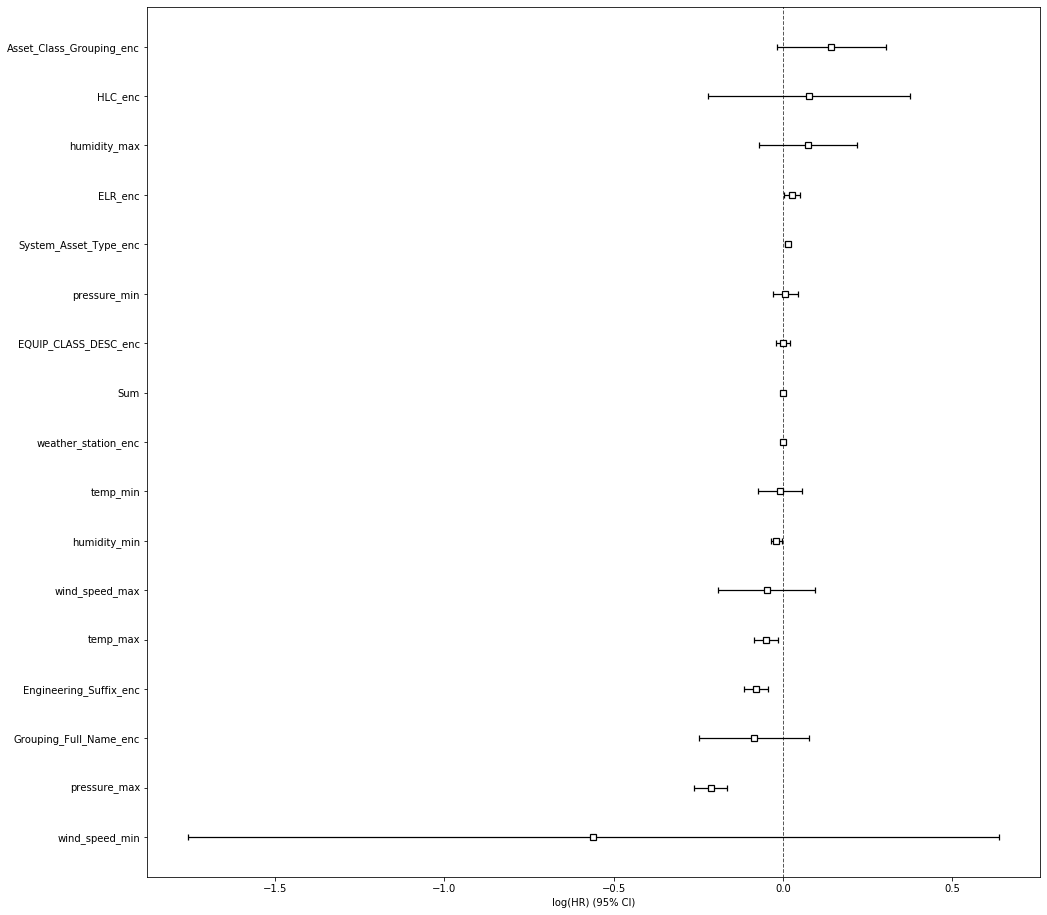

In [154]:
plt.figure(figsize=(16,16))
cph.plot()

<Figure size 1152x1152 with 0 Axes>

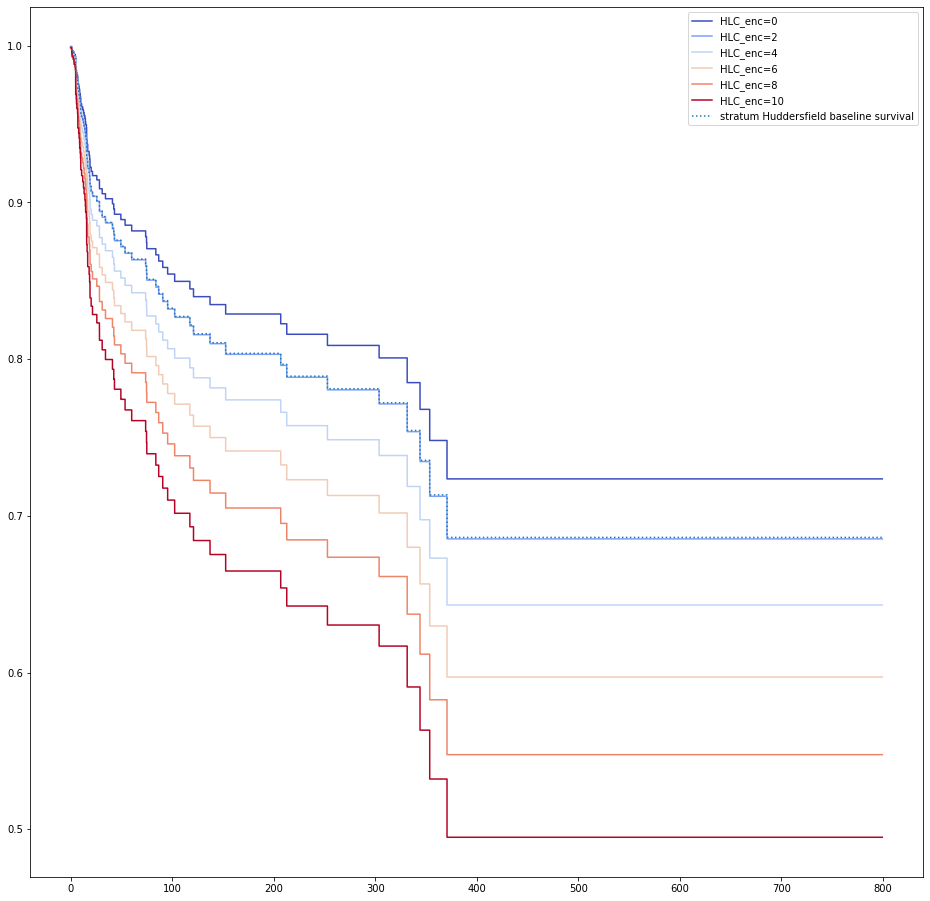

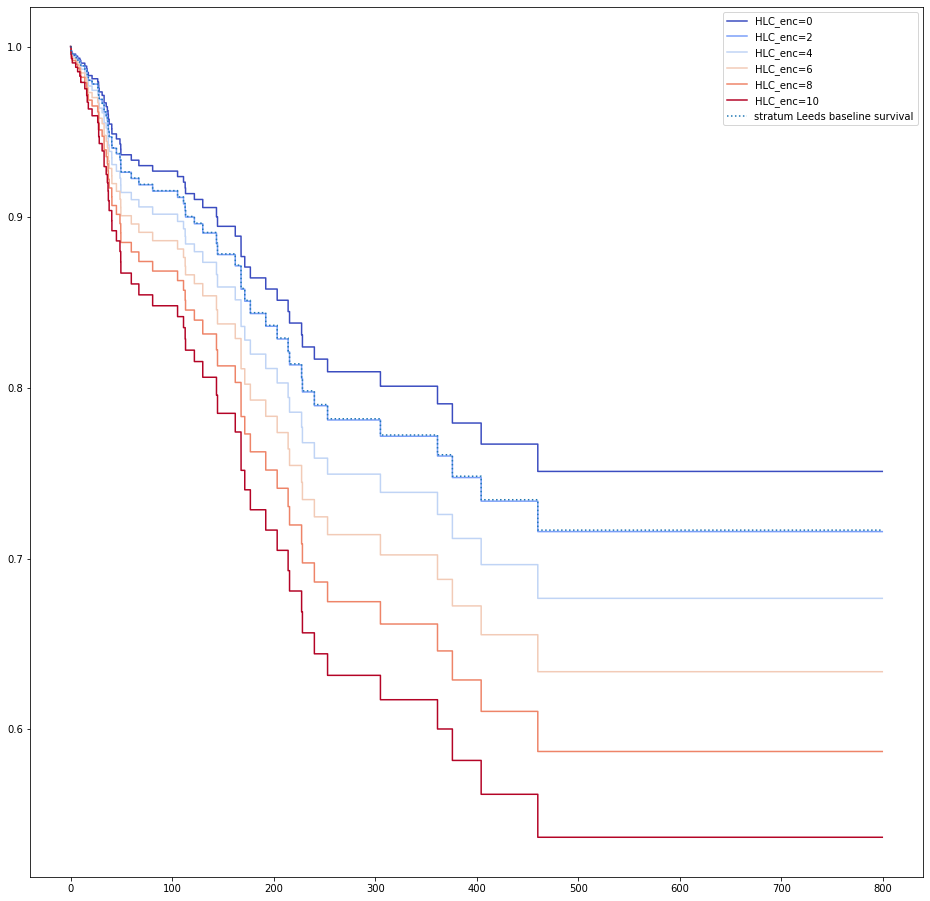

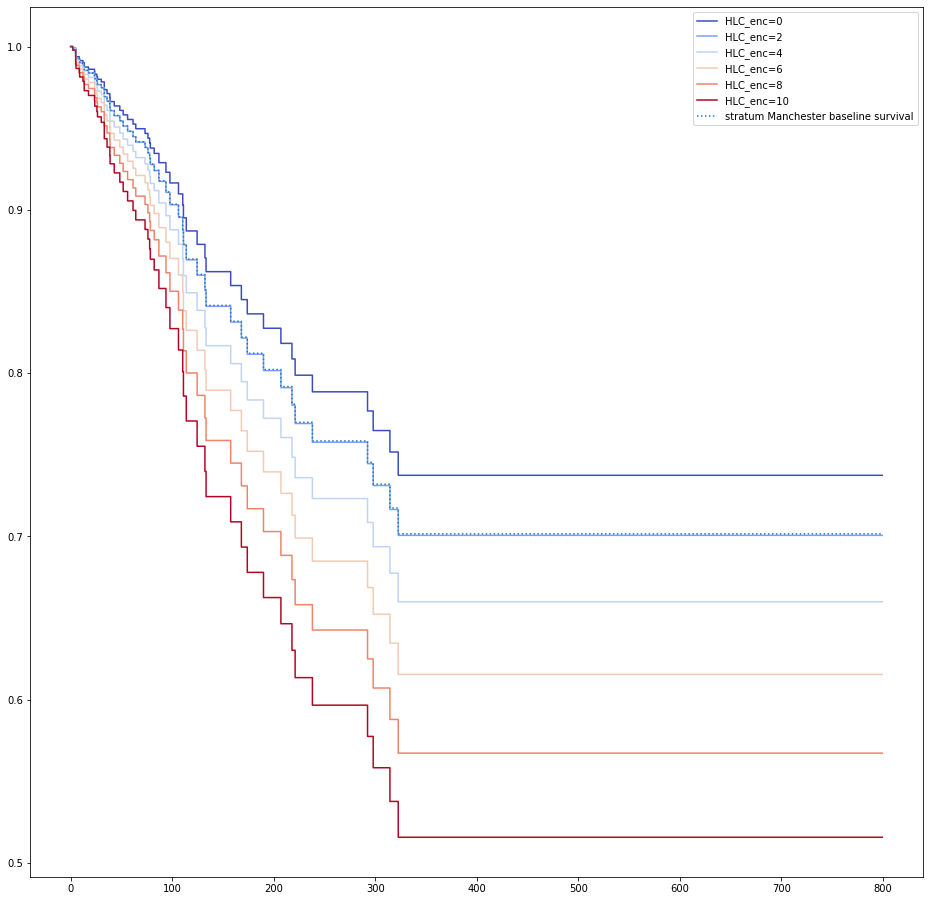

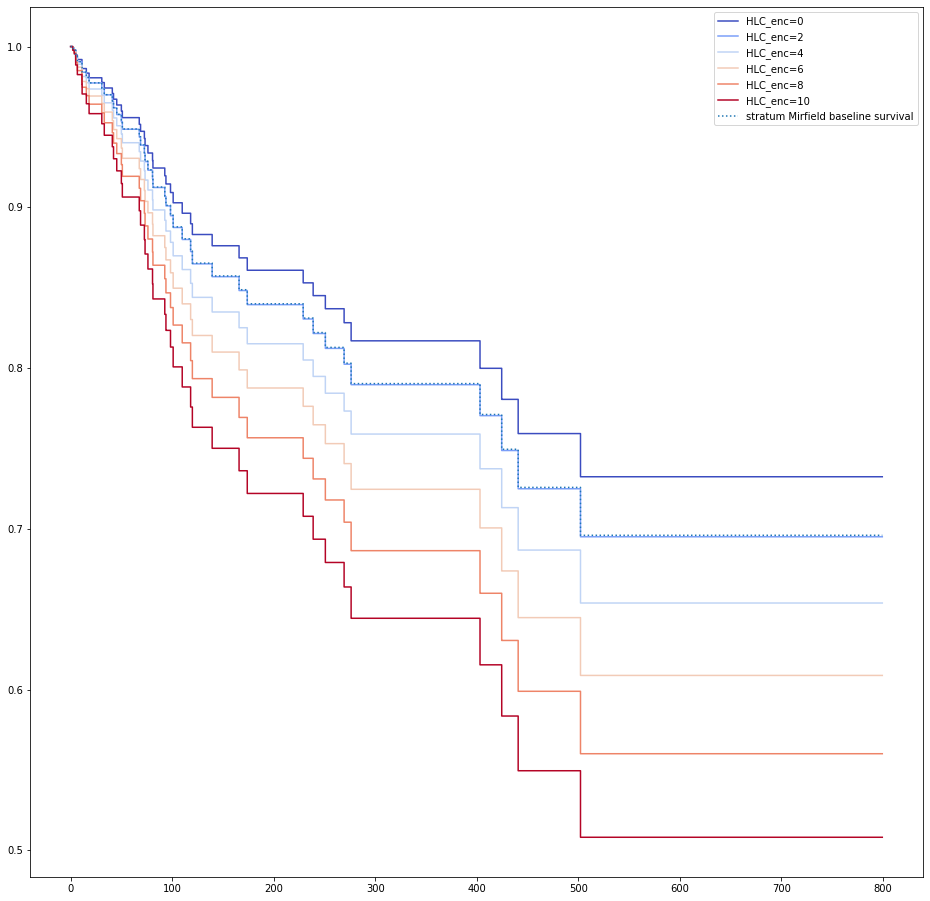

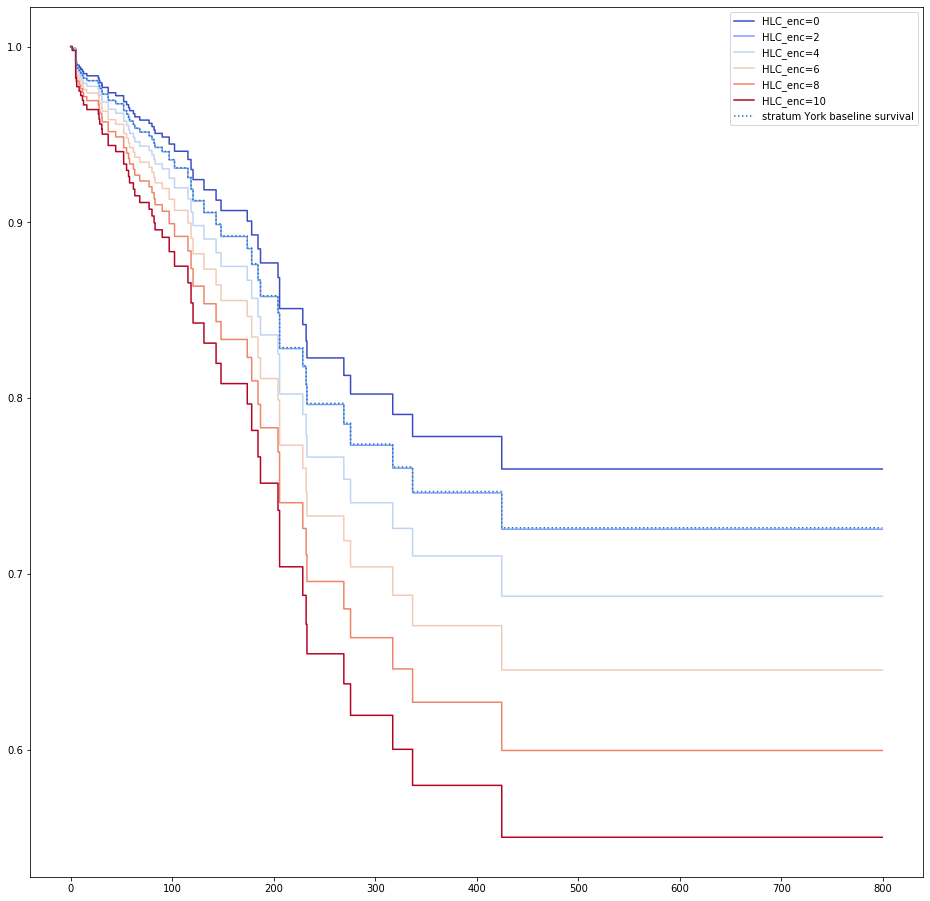

In [155]:
plt.figure(figsize=(16,16))
cph.plot_covariate_groups('HLC_enc', [0, 2, 4, 6, 8, 10], cmap='coolwarm',figsize=(16,16))

In [156]:
cph.check_assumptions(df_dummy)

The ``p_value_threshold`` is set at 0.01. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.





1. Variable 'temp_min' failed the non-proportional test: p-value is 0.0035.

   Advice 1: the functional form of the variable 'temp_min' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'temp_min' using pd.cut, and then specify it in
`strata=['temp_min', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'humidity_max' failed the non-proportional test: p-value is 0.0007.

   Advice 1: the functional form of the variable 'humidity_max' might be incorrect. That is, there
may be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a fu

In [157]:
cph1 = CoxPHFitter(penalizer=0.1)   ## Instantiate the class to create a cph object
cph1.fit(df_dummy, 'T', event_col='event',cluster_col='Asset_Number',
         strata=['weather_station','wind_speed_min','pressure_max','humidity_max','temp_min'])   ## Fit the data to train the model
cph1.print_summary()

model,lifelines.CoxPHFitter
duration col,'T'
event col,'event'
cluster col,'Asset_Number'
penalizer,0.1
robust variance,True
strata,"[weather_station, wind_speed_min, pressure_max..."
number of observations,940
number of events observed,303
partial log-likelihood,-152.21
time fit was run,2020-02-19 11:44:35 UTC


In [158]:
cph1.score_

0.6240506329113924

In [159]:
censored_subjects = df_dummy.loc[~df_dummy['event'].astype(bool)]

In [160]:
censored_subjects_last_obs = censored_subjects['T']

In [161]:
cph.predict_survival_function(censored_subjects, times=[0.04,5., 25., 50.], conditional_after=censored_subjects_last_obs)

,59,77,99,129,138,139,171,172,173,219,...,866,872,884,885,899,904,917,919,924,930
0.04,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.0,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000
5.00,1.000000,0.986940,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.0,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000
25.00,0.975269,0.971592,1.000000,0.993606,1.0,0.987419,1.0,1.0,1.0,0.991226,...,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,0.987716
50.00,0.960102,0.952417,0.992262,0.974953,1.0,0.973166,1.0,1.0,1.0,0.991226,...,1.0,1.0,1.0,1.0,1.0,0.994839,1.0,1.0,1.0,0.974244


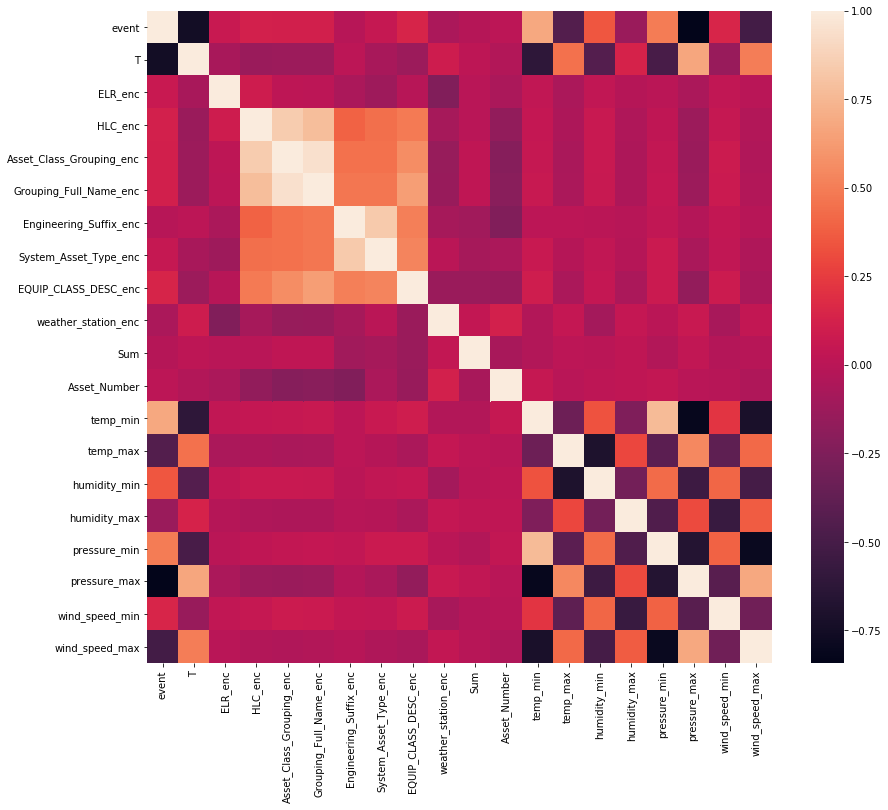

In [162]:
ax=plt.figure(figsize=(14,12))
corr = df_cox2.corr()

ax=sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [164]:
df_dummy.columns

Index(['event', 'T', 'ELR_enc', 'HLC_enc', 'Asset_Class_Grouping_enc',
       'Grouping_Full_Name_enc', 'Engineering_Suffix_enc',
       'System_Asset_Type_enc', 'weather_station', 'EQUIP_CLASS_DESC_enc',
       'weather_station_enc', 'Sum', 'Asset_Number', 'temp_min', 'temp_max',
       'humidity_min', 'humidity_max', 'pressure_min', 'pressure_max',
       'wind_speed_min', 'wind_speed_max'],
      dtype='object')

In [165]:
df_dummy.drop('weather_station', axis=1, inplace=True)

In [166]:
from lifelines import WeibullAFTFitter


aft = WeibullAFTFitter()
aft.fit(df_dummy, duration_col='T', event_col='event', clu)

aft.print_summary(3)  # access the results using aft.summary

In [167]:
print(aft.median_survival_time_)
print(aft.mean_survival_time_)

1180.7699021263852
2169.5501821682847


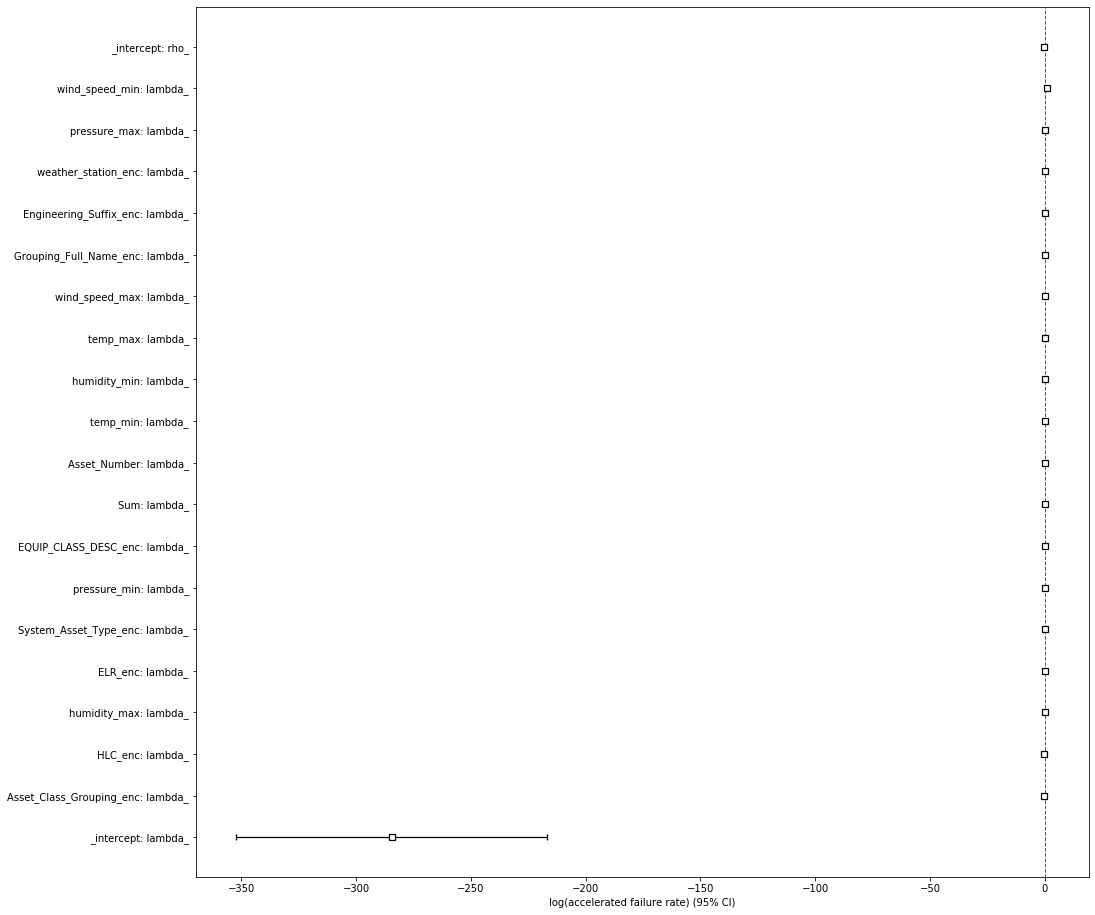

In [168]:
plt.figure(figsize=(16,16))
aft.plot()

In [67]:
import patsy
X1 = patsy.dmatrix('Asset_Number + High_Level_Asset_Class + event + T  + weather_station + temp_24h_d + pressure_24h_d + humidity_24h_d + wind_speed_24h_d + wind_speed_24h_d_h + wind_speed_24h_d_l + temp_24h_range + temp_1w_d + pressure_1w_d + humidity_1w_d + wind_speed_1w_d + wind_speed_1w_d_h + wind_speed_1w_d_l + temp_1w_range', df_cox3, return_type='dataframe')

X1

,Intercept,High_Level_Asset_Class[T.P&C],High_Level_Asset_Class[T.S&T],High_Level_Asset_Class[T.Track],weather_station[T.Leeds],weather_station[T.Manchester],weather_station[T.Mirfield],weather_station[T.York],Asset_Number,event,...,wind_speed_24h_d_h,wind_speed_24h_d_l,temp_24h_range,temp_1w_d,pressure_1w_d,humidity_1w_d,wind_speed_1w_d,wind_speed_1w_d_h,wind_speed_1w_d_l,temp_1w_range
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1011867.0,0.0,...,7.0,3.0,2.780,16.5400,1006.0,88.0,4.0,7.0,0.0,4.024564
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1063020.0,0.0,...,6.0,2.0,2.220,17.0700,1005.0,88.0,3.0,8.0,0.0,4.043420
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10290424.0,0.0,...,6.0,2.0,2.220,17.0700,1005.0,88.0,3.0,8.0,0.0,4.043420
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14105964.0,1.0,...,5.0,3.0,1.000,6.8600,1008.0,93.0,4.0,9.0,0.0,2.196825
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14105964.0,1.0,...,21.0,1.0,5.000,4.7500,1021.0,86.0,3.0,21.0,0.0,4.512821
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14105964.0,1.0,...,5.0,1.0,5.000,8.6400,1022.0,75.0,4.0,9.0,1.0,3.218935
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14105964.0,0.0,...,6.0,2.0,2.220,17.0700,1005.0,88.0,3.0,8.0,0.0,4.043420
8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10290512.0,1.0,...,5.0,1.0,2.000,6.0215,1018.0,87.5,3.0,13.0,0.0,2.769565
9,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10290474.0,0.0,...,7.0,3.0,2.780,16.5400,1006.0,88.0,4.0,7.0,0.0,4.024564
10,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10290512.0,0.0,...,7.0,3.0,2.780,16.5400,1006.0,88.0,4.0,7.0,0.0,4.024564


In [70]:
prediction = cph.predict_survival_function(X1, times=[1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95., 96., 97., 98., 99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143., 144., 145., 146., 147., 148., 149., 150., 151., 152., 153., 154., 155., 156., 157., 158., 159., 160., 161., 162., 163., 164., 165., 166., 167., 168., 169., 170., 171., 172., 173., 174., 175., 176., 177., 178., 179., 180., 181., 182., 183., 184., 185., 186., 187., 188., 189., 190., 191., 192., 193., 194., 195., 196., 197., 198., 199., 200., 201., 202., 203., 204., 205., 206., 207., 208., 209., 210., 211., 212., 213., 214., 215., 216., 217., 218., 219., 220., 221., 222., 223., 224., 225., 226., 227., 228., 229., 230., 231., 232., 233., 234., 235., 236., 237., 238., 239., 240., 241., 242., 243., 244., 245., 246., 247., 248., 249., 250., 251., 252., 253., 254., 255., 256., 257., 258., 259., 260., 261., 262., 263., 264., 265., 266., 267., 268., 269., 270., 271., 272., 273., 274., 275., 276., 277., 278., 279., 280., 281., 282., 283., 284., 285., 286., 287., 288., 289., 290., 291., 292., 293., 294., 295., 296., 297., 298., 299., 300., 301., 302., 303., 304., 305., 306., 307., 308., 309., 310., 311., 312., 313., 314., 315., 316., 317., 318., 319., 320., 321., 322., 323., 324., 325., 326., 327., 328., 329., 330., 331., 332., 333., 334., 335., 336., 337., 338., 339., 340., 341., 342., 343., 344., 345., 346., 347., 348., 349., 350., 351., 352., 353., 354., 355., 356., 357., 358., 359., 360., 361., 362., 363., 364., 365., 366., 367., 368., 369., 370., 371., 372., 373., 374., 375., 376., 377., 378., 379., 380., 381., 382., 383., 384., 385., 386., 387., 388., 389., 390., 391., 392., 393., 394., 395., 396., 397., 398., 399., 400., 401., 402., 403., 404., 405., 406., 407., 408., 409., 410., 411., 412., 413., 414., 415., 416., 417., 418., 419., 420., 421., 422., 423., 424., 425., 426., 427., 428., 429., 430., 431., 432., 433., 434., 435., 436., 437., 438., 439., 440., 441., 442., 443., 444., 445., 446., 447., 448., 449., 450., 451., 452., 453., 454., 455., 456., 457., 458., 459., 460., 461., 462., 463., 464., 465., 466., 467., 468., 469., 470., 471., 472., 473., 474., 475., 476., 477., 478., 479., 480., 481., 482., 483., 484., 485., 486., 487., 488., 489., 490., 491., 492., 493., 494., 495., 496., 497., 498., 499., 500., 501., 502., 503., 504., 505., 506., 507., 508., 509., 510., 511., 512., 513., 514., 515., 516., 517., 518., 519., 520., 521., 522., 523., 524., 525., 526., 527., 528., 529., 530., 531., 532., 533., 534., 535., 536., 537., 538., 539., 540., 541., 542., 543.])
prediction

,0,1,2,3,4,5,6,7,8,9,...,930,931,932,933,934,935,936,937,938,939
1.0,0.999557,0.959384,0.981203,0.977779,0.999557,0.994712,0.998785,0.974977,0.998785,0.998785,...,0.999205,0.999710,0.999710,0.999710,0.999311,0.999140,0.999710,0.999710,0.999710,0.999749
2.0,0.999164,0.924744,0.964828,0.958485,0.999164,0.990045,0.997709,0.953310,0.997709,0.997709,...,0.998500,0.999453,0.999453,0.999453,0.998700,0.998377,0.999453,0.999453,0.999453,0.999527
3.0,0.998960,0.907257,0.956435,0.948619,0.998960,0.987631,0.997151,0.942251,0.997151,0.997151,...,0.998134,0.999319,0.999319,0.999319,0.998383,0.997982,0.999319,0.999319,0.999319,0.999411
4.0,0.998742,0.888908,0.947533,0.938173,0.998742,0.985053,0.996554,0.930558,0.996554,0.996554,...,0.997743,0.999176,0.999176,0.999176,0.998044,0.997559,0.999176,0.999176,0.999176,0.999288
5.0,0.996895,0.747574,0.875343,0.854135,0.996895,0.963480,0.991509,0.837111,0.991509,0.991509,...,0.994432,0.997966,0.997966,0.997966,0.995176,0.993979,0.997966,0.997966,0.997966,0.998241
6.0,0.996498,0.720210,0.860531,0.837047,0.996498,0.958897,0.990426,0.818248,0.990426,0.990426,...,0.993721,0.997706,0.997706,0.997706,0.994559,0.993210,0.997706,0.997706,0.997706,0.998016
7.0,0.996093,0.693359,0.845698,0.819987,0.996093,0.954249,0.989323,0.799467,0.989323,0.989323,...,0.992997,0.997440,0.997440,0.997440,0.993931,0.992427,0.997440,0.997440,0.997440,0.997786
8.0,0.995793,0.674092,0.834861,0.807558,0.995793,0.950816,0.988506,0.785815,0.988506,0.988506,...,0.992460,0.997244,0.997244,0.997244,0.993465,0.991847,0.997244,0.997244,0.997244,0.997616
9.0,0.995226,0.639084,0.814732,0.784552,0.995226,0.944354,0.986962,0.760616,0.986962,0.986962,...,0.991444,0.996871,0.996871,0.996871,0.992585,0.990750,0.996871,0.996871,0.996871,0.997294
10.0,0.994741,0.610632,0.797927,0.765425,0.994741,0.938870,0.985646,0.739738,0.985646,0.985646,...,0.990578,0.996554,0.996554,0.996554,0.991834,0.989813,0.996554,0.996554,0.996554,0.997019


In [72]:
df_cox3.to_csv('cox_master.csv')
X1.to_csv('cox_master_dummy.csv')
prediction.to_csv('cox_master_prediciton.csv')